# The Sweet Science of Success: A Nobel Mystery!

There is a theory floating around that there is a link between eating chococolate and intelligence. In fact, it has been suggested that Nobel Prize winners tend to come from countries that eat a lot of chocolate. Could indulging in chocolate boost intelligence? Or perhaps, does groundbreaking scientific discovery lead to a craving for cocoa?

<img src = '../imgs/einstein.png' width = 300>
* AI-generated image

First, we need to import the libraries essential for our investigation: `pandas` for data handling and `matplotlib` for visualizations. We will also be using another visualization library, `seaborn`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/argonneed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## The Data

Our dataset contains combined data on countries' populations, chocolate consumption, and Nobel Laureate counts.

In [2]:
# Load the data from the .csv file and view the first few lines
chocolate = pd.read_csv('../data/nobel-chocolate.csv')
chocolate.head()

,country,chocolate_kg_person,nobel_laureates,population_2018
0,Switzerland,8.8,28,8544034
1,Sweden,8.1,30,9982709
2,Austria,7.9,22,8751820
3,Denmark,7.9,14,5754356
4,Norway,6.6,13,5353363


### A First Look at the Data

As we have seen before, getting a good feel for the data, its structure and some summary statistics is a good first step. 

In [3]:
# Get technical info on the data and the types
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              19 non-null     object 
 1   chocolate_kg_person  19 non-null     float64
 2   nobel_laureates      19 non-null     int64  
 3   population_2018      19 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 736.0+ bytes


In [4]:
# Get summary statistics of the numerical data
chocolate.describe()

,chocolate_kg_person,nobel_laureates,population_2018
count,19.000000,19.000000,1.900000e+01
mean,5.115789,42.105263,1.240195e+08
std,2.368840,86.450303,3.223885e+08
min,0.100000,3.000000,4.749598e+06
25%,4.600000,9.500000,7.149195e+06
50%,5.000000,14.000000,1.149852e+07
75%,6.200000,28.000000,7.376336e+07
max,8.800000,383.000000,1.415046e+09


### The Importance of Normalization: Making Comparisons Fair

A country with a very large population will naturally have more Nobel laureates, simply because there are more people. This makes it difficult to tell if the relationship is truly about chocolate or Nobel-winning potential, or just about the sheer number of people.

This is where **normalization** comes in. Normalization is the process of scaling data to allow for fair comparisons between different entities, by accounting for underlying differences (like population size).

To make a more meaningful comparison, we will normalize the number of Nobel laureates by the country's population. This will give us a new metric: "Nobel Laureates per 10 Million People". This allows us to compare the "Nobel efficiency" of countries regardless of their size, giving us a clearer picture of the true relationship with chocolate:

$$\text{Nobel Laureates per 10 Million} = \left( \frac{\text{Number of Nobel Laureates}}{\text{Population}} \right) \times 10,000,000$$

In [5]:
# Add a new column with the normalized data
chocolate['nobels_per_10M'] = (chocolate['nobel_laureates'] / chocolate['population_2018']) * 10e6
chocolate.head()

,country,chocolate_kg_person,nobel_laureates,population_2018,nobels_per_10M
0,Switzerland,8.8,28,8544034,32.771405
1,Sweden,8.1,30,9982709,30.051963
2,Austria,7.9,22,8751820,25.137629
3,Denmark,7.9,14,5754356,24.329395
4,Norway,6.6,13,5353363,24.283801


## Creating a Scatter Plot

Now for the moment of truth! We will use `seaborn` to create a scatter plot. Each point on the plot represents a country, with its X-coordinate being its chocolate consumption per person and its Y-coordinate being its Nobel laureates per 10 million people.

### Why use Seaborn for Plotting?

You've already gained experience with `matplotlib.pyplot` for creating plots, which is a powerful and foundational Python plotting library. Now, we're introducing `seaborn`, which is another excellent library for data visualization. You might wonder, why use two different libraries for plotting?

Here's why `seaborn` is particularly useful, especially for exploring relationships in data and creating clear scientific visualizations.

1.  **Less Code**: Seaborn provides a higher-level interface than Matplotlib. This means you can often create complex and statistically-rich plots with fewer lines of code. 

2.  **Integrated with Pandas DataFrames**: Seaborn is designed to work seamlessly with pandas DataFrames.

3.  **Complementary to Matplotlib**: Seaborn is built on top of Matplotlib. This means your knowledge of Matplotlib is still very valuable! You can use Seaborn for the high-level plotting and then use Matplotlib functions (`plt.title()`, `plt.xlabel()`, `plt.legend()`, `plt.show()`, etc.) to further customize and refine your plots. They work together hand-in-hand.

4.  **Aesthetics and Professional Appearance**: Seaborn comes with built-in themes and color palettes that produce aesthetically pleasing and professional-looking plots by default.

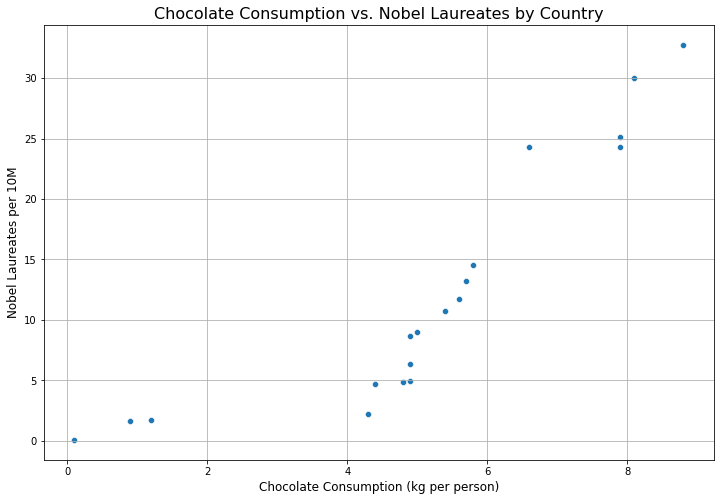

In [6]:
plt.figure(figsize=(12, 8))
ax= sns.scatterplot(x='chocolate_kg_person', y='nobels_per_10M', data=chocolate)

plt.title('Chocolate Consumption vs. Nobel Laureates by Country', fontsize=16)
plt.xlabel('Chocolate Consumption (kg per person)', fontsize=12)
plt.ylabel('Nobel Laureates per 10M', fontsize=12)
plt.grid(True)
plt.show()

### Getting More Control Over Your Plots

In the previous cell, we created a basic scatter plot with seaborn. Now let's learn about an important concept that will give you much more control over your plots: the **axes object**, commonly stored in a variable called `ax`.

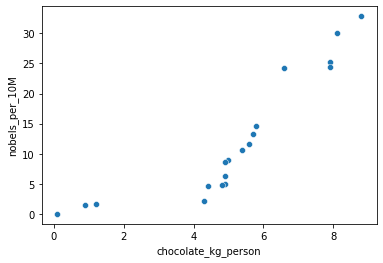

In [7]:
# seaborn creates the plot AND returns the axes object
ax = sns.scatterplot(data=chocolate, x='chocolate_kg_person', y='nobels_per_10M')

#### 1. Add Annotations and Labels

Text(8.8, 31.9, 'Switzerland')

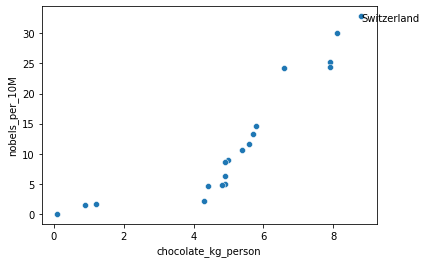

In [8]:
ax = sns.scatterplot(data=chocolate, x='chocolate_kg_person', y='nobels_per_10M')

# Now we can use ax to add annotations to that specific plot
ax.annotate('Switzerland', (8.8, 31.9))

#### 2. Customize Axes Labels

Text(0, 0.5, 'Nobel Prizes per 10M Population')

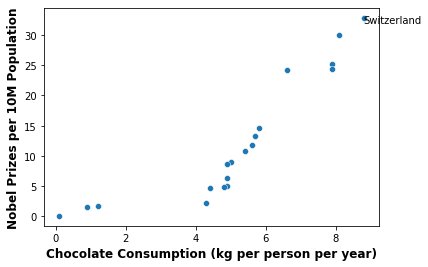

In [9]:
ax = sns.scatterplot(data=chocolate, x='chocolate_kg_person', y='nobels_per_10M')
ax.annotate('Switzerland', (8.8, 31.9))

# Customize axis labels with more options
ax.set_xlabel('Chocolate Consumption (kg per person per year)', fontsize=12, fontweight='bold')
ax.set_ylabel('Nobel Prizes per 10M Population', fontsize=12, fontweight='bold')

#### 3. Adding Grid Lines

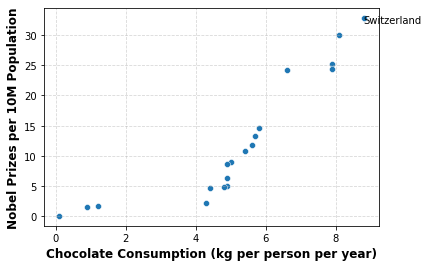

In [10]:
ax = sns.scatterplot(data=chocolate, x='chocolate_kg_person', y='nobels_per_10M')
ax.annotate('Switzerland', (8.8, 31.9))
ax.set_xlabel('Chocolate Consumption (kg per person per year)', fontsize=12, fontweight='bold')
ax.set_ylabel('Nobel Prizes per 10M Population', fontsize=12, fontweight='bold')

# Add a custom grid
ax.grid(True, alpha=0.5, linestyle= '--')

#### 4. Set Axes Limits

(0.0, 35.0)

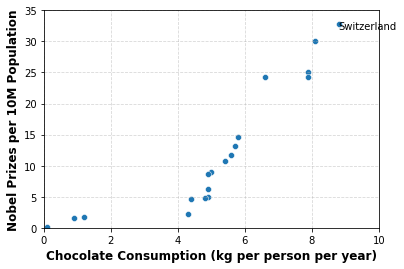

In [11]:
ax = sns.scatterplot(data=chocolate, x='chocolate_kg_person', y='nobels_per_10M')
ax.annotate('Switzerland', (8.8, 31.9))
ax.set_xlabel('Chocolate Consumption (kg per person per year)', fontsize=12, fontweight='bold')
ax.set_ylabel('Nobel Prizes per 10M Population', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.5, linestyle= '--')

# Set axis limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 35)

#### Selective Labeling with Annotations

When creating scatter plots with many data points, labeling every single point can make your plot cluttered and hard to read. Instead, we can selectively label only the most interesting or important points. Let's break down how this code works step by step.

1. **Choose which countries to label**:
   This creates a list of countries we want to highlight. We chose these because they represent:

- Extreme values: Switzerland (highest in both), China (low in both)
- Major countries: United States, Germany, Japan
- Interesting cases: Countries that help tell the story

In [12]:
notable_countries = ['Switzerland', 'Sweden', 'Norway', 'Germany', 'United States', 
                    'China', 'Japan', 'Brazil']

2. **Loop through all countries**: check if they're in our notable list, and if so, add a label at their data point position

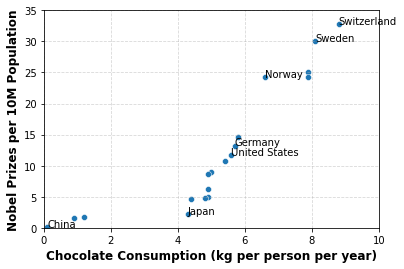

In [13]:
ax = sns.scatterplot(data=chocolate, x='chocolate_kg_person', y='nobels_per_10M')
ax.set_xlabel('Chocolate Consumption (kg per person per year)', fontsize=12, fontweight='bold')
ax.set_ylabel('Nobel Prizes per 10M Population', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.5, linestyle= '--')
ax.set_xlim(0, 10)
ax.set_ylim(0, 35)

for i, country in enumerate(chocolate['country']):
    if country in notable_countries:
        ax.annotate(country, 
                   (chocolate['chocolate_kg_person'].iloc[i], chocolate['nobels_per_10M'].iloc[i]))

## Quantifying the Connection: Correlation Coefficient

Visualizing the data is great, but to quantify the strength and direction of the linear relationship, we calculate the **Pearson Correlation Coefficient**. This value ranges from -1 to +1:
* `+1`: Perfect positive linear correlation (as one variable increases, the other increases proportionally).
* `-1`: Perfect negative linear correlation (as one variable increases, the other decreases proportionally).
* `0`: No linear correlation.


In [14]:
correlation = chocolate['chocolate_kg_person'].corr(chocolate['nobels_per_10M'])
print(f"Pearson Correlation Coefficient between Chocolate Consumption and Nobel Laureates is: {correlation:.2f}")

Pearson Correlation Coefficient between Chocolate Consumption and Nobel Laureates is: 0.88


### The Original Research

In 2012, Dr. Franz Messerli published a study in the prestigious New England Journal of Medicine titled "Chocolate Consumption, Cognitive Function, and Nobel Laureates." You've successfully uncovered a fascinating pattern, just like the researchers in 2012! The scatter plot likely shows a clear relationship, and the correlation coefficient probably indicates a strong connection.

But here's the crucial question: **Does this mean that eating more chocolate *causes* a country to produce more Nobel laureates, or that winning Nobel Prizes somehow *leads* to more chocolate consumption?**

### Spoiler Alert (Do not view!)

Dr. Messerli's paper wasn't your typical medical research, it was a deliberate exploration of spurious correlation that became famous worldwide.

As the original study highlighted, a strong correlation between two seemingly unrelated variables often points to a **confounding variable (or "sneaky third variable")** that influences both.

In the case of chocolate consumption and Nobel Prize winners by country, what do you think that "sneaky third variable" might be? Consider what characteristics high-ranking countries (like Switzerland, Sweden, or the USA) tend to share, and what might be less common in lower-ranking countries.

The most likely confounding variable is **national wealth and development**.
* **Wealthy countries** can afford higher per capita consumption of luxury goods like chocolate.
* **Wealthy countries** also tend to:
    * Better-funded universities and research institutions.
    * Stronger educational systems.
    * More investment in science, technology, and arts.
    * Stable environments that foster long-term research and innovation.

Switzerland, a wealthy nation, consistently ranks high in both chocolate consumption and Nobel laureates. Many developing nations, with lower wealth, rank low on both measures. The chocolate doesn't cause the Nobel Prizes; rather, a nation's overall prosperity facilitates both.

**Key Takeaway:** This data mystery perfectly illustrates the most important lesson in statistics and data science: **Correlation does not imply causation!** Just because two things move together doesn't mean one causes the other. Always look for a plausible mechanism, consider other influencing factors (especially "sneaky third variables"), and question your assumptions!

#### Explore Further!

* To strengthen the "national wealth" argument, what other data could you try to find and plot?
* Can you think of other absurd or humorous "spurious correlations" that might exist in the world, and what their confounding variables might be?